# IMDb Sentiment Analysis with ScatterText

## Overview

This notebook performs sentiment analysis on the IMDb movie reviews dataset. It preprocesses the text data, visualizes review characteristics, and uses ScatterText to explore linguistic differences between positive and negative reviews.

## Steps

1. **Import Libraries**
   - Import necessary libraries for data manipulation, visualization, and text processing.
   
2. **Load Dataset**
   - Load the IMDb dataset (`IMDBDataset.csv`) into a pandas DataFrame.
   
3. **Expand Contractions**
   - Expand common English contractions in the reviews for consistency.
   
4. **Clean Text Data**
   - Remove punctuation, HTML tags, numbers, and unnecessary characters from the reviews.
   
5. **Label Encoding**
   - Convert sentiment labels (`positive` and `negative`) to numerical values (`1` and `0`).
   
6. **Analyze Review Length**
   - Add a column for the length of each cleaned review and visualize the distribution for positive and negative reviews.
   
7. **Generate Word Clouds**
   - Create word clouds for both positive and negative reviews to highlight the most frequent words.
   
8. **ScatterText Visualization**
   - Process the text with SpaCy, remove stopwords, and generate an interactive ScatterText visualization to compare linguistic patterns between sentiments.


In [4]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [6]:
data = pd.read_csv('./csv/IMDBDataset.csv')

In [7]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
#https://stackoverflow.com/questions/43018030/replace-apostrophe-short-words-in-python
contractions = {
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "I would",
"i'd've": "I would have",
"i'll": "I will",
"i'll've": "I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "wwho is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}
text="What's the best way to ensure this?"


data_2 = list(data['review'])

def expand_contractions(contractions, data):
    
    reviews = []
    for words in data:
        for word in words.split():
            if word.lower() in contractions:
                words = words.replace(word, contractions[word.lower()])
        reviews.append(words)
    
    return reviews

data['reviews_no_contractions'] = expand_contractions(contractions,data_2 )

In [6]:
data.head()

,review,sentiment,reviews_no_contractions
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically there is a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is..."


## Clean the text from tags and punctuations

In [7]:
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\] |(\d*)|(\'s)|(\_)|(\__))")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "


reviews = data['reviews_no_contractions']

def preprocess_reviews(reviews):
    
    
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]
    
    return reviews

In [8]:
data['reviews_clean'] = preprocess_reviews(reviews)

In [9]:
data.head()

,review,sentiment,reviews_no_contractions,reviews_clean
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. <br /><br />The...,a wonderful little production the filming tec...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically there is a family where a little boy...,basically there is a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love in the time of money is a v...


## Column with numeric value for the positive and negative reviews

In [10]:
data['label'] = data.sentiment.replace(to_replace=['positive', 'negative'], value=[1, 0])
data.groupby(by='label').count()

,review,sentiment,reviews_no_contractions,reviews_clean
label,,,,
0,25000,25000,25000,25000
1,25000,25000,25000,25000


## Add Column with string length for each review

In [11]:
data['clean_length']=data['reviews_clean'].str.len()

In [12]:
data.head()

,review,sentiment,reviews_no_contractions,reviews_clean,label,clean_length
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...,1,1682
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. <br /><br />The...,a wonderful little production the filming tec...,1,944
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...,1,883
3,Basically there's a family where a little boy ...,negative,Basically there is a family where a little boy...,basically there is a family where a little boy...,0,697
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love in the time of money is a v...,1,1238


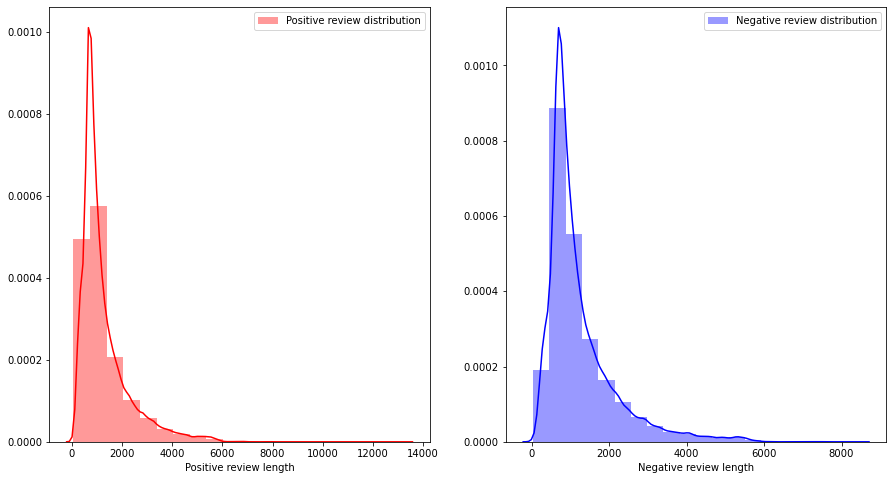

In [12]:
#https://www.kaggle.com/smokingkrils/preprocessing-visualizations-and-accuracy
f,ax=plt.subplots(1,2,figsize=(15,8))

sns.distplot(data[data['label']==1]['clean_length'],bins=20,ax=ax[0],label='Positive review distribution',color='r')

ax[0].set_xlabel('Positive review length')
ax[0].legend()

sns.distplot(data[data['label']==0]['clean_length'],bins=20,ax=ax[1],label='Negative review distribution',color='b')

ax[1].set_xlabel('Negative review length')
ax[1].legend()

plt.show()

## Wordcloud positive reviews

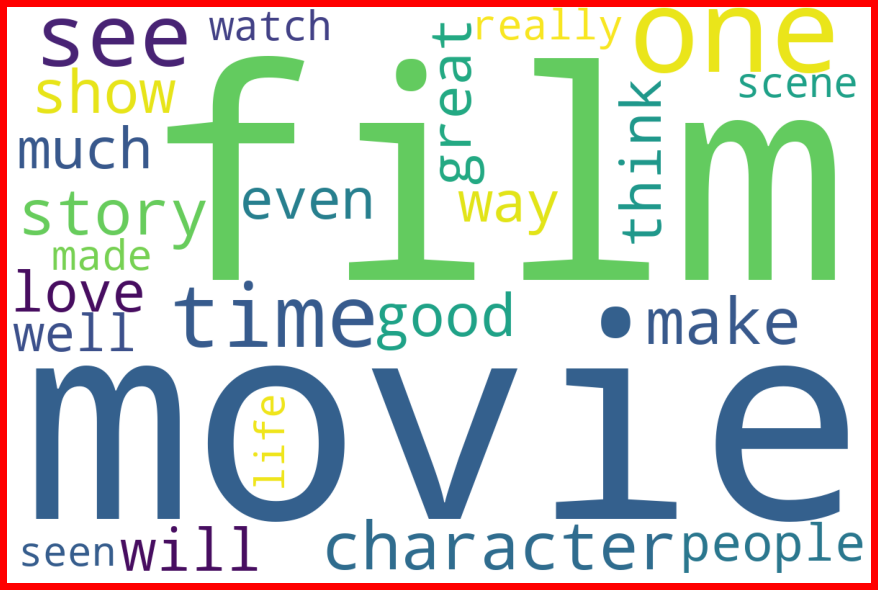

In [13]:
##https://www.kaggle.com/smokingkrils/preprocessing-visualizations-and-accuracy
positive=data['reviews_clean'][data['label']==1]
spamcloud=WordCloud(width=1200,height=800,background_color='white',max_words=25).generate(' '.join(positive))

plt.figure(figsize=(12,8),facecolor='r')
plt.imshow(spamcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Wordcloud negative reviews

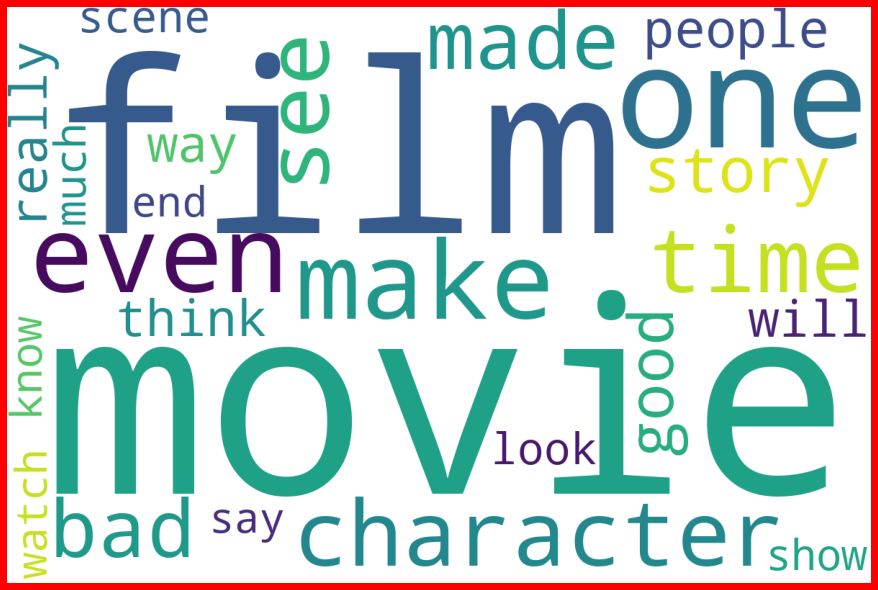

In [14]:
negative=data['reviews_clean'][data['label']==0]
spamcloud=WordCloud(width=1200,height=800,background_color='white',max_words=25).generate(' '.join(negative))

plt.figure(figsize=(12,8),facecolor='r')
plt.imshow(spamcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# ScatterText

In [15]:
import scattertext as st
import spacy
from pprint import pprint
from alibi.utils.download import spacy_model

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rober\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
model = 'en_core_web_md'
spacy_model(model=model)
nlp = spacy.load(model)

In [34]:
sample_data = data[:2500]

In [35]:
#sample_data.insert(0, 'New_ID', range(len(sample_data)))

In [36]:
stop_words = stopwords.words('english')
sample_data['reviews_clean_no_stop'] = sample_data['reviews_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [37]:
sample_data['parsed'] = sample_data.reviews_clean_no_stop.apply(nlp)

In [38]:
sample_data.head()

,review,sentiment,reviews_no_contractractions,reviews_clean,label,clean_length,reviews_clean_no_stop,parsed
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...,1,1682,one reviewers mentioned watching oz episode ho...,"(one, reviewers, mentioned, watching, oz, epis..."
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. <br /><br />The...,a wonderful little production the filming tec...,1,944,wonderful little production filming technique ...,"(wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...,1,883,thought wonderful way spend time hot summer we...,"(thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,Basically there is a family where a little boy...,basically there is a family where a little boy...,0,697,basically family little boy jake thinks zombie...,"(basically, family, little, boy, jake, thinks,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love in the time of money is a v...,1,1238,petter mattei love time money visually stunnin...,"(petter, mattei, love, time, money, visually, ..."


In [39]:
corpus = st.CorpusFromParsedDocuments(sample_data, category_col='sentiment', parsed_col='parsed').build()

In [40]:
import scattertext as st
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("<style>.container { width:98% !important; }</style>"))

In [41]:
html = st.produce_scattertext_explorer(corpus,
                                       category='positive',
                                       category_name='Positive',
                                       not_category_name='Negative',
                                       minimum_term_frequency=5,
                                       width_in_pixels=1000,
                                       transform=st.Scalers.log_scale_standardize)
file_name = 'ScattertextLog2500.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)